# Logistic Regression using Gredient Decent

### What is Logistic Regression?
Logistic regression is a supervised machine learning algorithm used for binary classification problems, where the goal is to predict one of two possible outcomes (e.g., yes/no, 0/1, success/failure). Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities that map to discrete classes.

### Logistic Regression using Gradient Descent: Step-by-Step Algorithm

#### 1. Import Libraries and Load Data
    1) Use essential libraries such as NumPy, Pandas, and Matplotlib for mathematical calculations, data manipulation, and plotting.
    2) Load the dataset using Pandas and extract the independent variable (Glucose) and dependent variable (Outcome) as inputs and outputs.

#### 2. Visualize the Data
    Create a scatter plot to observe the relationship between the independent and dependent variables.

#### 3. Define the Sigmoid Function
    Implement a function that maps values to a range between 0 and 1. This function is essential for logistic regression as it outputs probabilities.

#### 4. Define the Probability Function
    Create a function that calculates the probability of an input belonging to a particular class using the sigmoid function.

#### 5. Define the Cost Function
    Write a function that measures how well the model predicts the actual outcomes. This cost function uses logarithmic terms to handle probabilities effectively and penalizes incorrect predictions more heavily.

#### 6. Gradient Descent Algorithm
    1) Initialize the parameters (intercept and slope) with arbitrary values.
    2) Set a learning rate to control the step size for parameter updates.
    3) Use an iterative approach to adjust the parameters:
        1. Update the intercept by reducing the cumulative error contribution of incorrect predictions.
        2. Update the slope by considering the error and its relationship with the independent variable values.
    4) Continue updating until the cost function stops changing significantly (i.e., the algorithm converges).

#### 7. Predict Outcomes
    After training, use the optimized parameters to make predictions:
        1) For each input value, calculate the probability of belonging to the positive class.
        2) Assign the predicted class based on whether the probability exceeds a threshold (e.g., 0.5).

#### 8. Visualize Predictions
    Create a scatter plot showing the actual data points and another plot overlaying the predicted outcomes. This visualization helps assess how well the model distinguishes between classes.

#### 9. Evaluate the Model
    Optionally, measure the model's performance using metrics such as accuracy, precision, recall, or 
𝐹
1
F 
1
​
 -score to determine how effectively it classifies the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
x = df['Glucose'].values

In [5]:
x

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 115, 126,  99, 196, 119, 143, 125,
       147,  97, 145, 117, 109, 158,  88,  92, 122, 103, 138, 102,  90,
       111, 180, 133, 106, 171, 159, 180, 146,  71, 103, 105, 103, 101,
        88, 176, 150,  73, 187, 100, 146, 105,  84, 133,  44, 141, 114,
        99, 109, 109,  95, 146, 100, 139, 126, 129,  79,   0,  62,  95,
       131, 112, 113,  74,  83, 101, 137, 110, 106, 100, 136, 107,  80,
       123,  81, 134, 142, 144,  92,  71,  93, 122, 163, 151, 125,  81,
        85, 126,  96, 144,  83,  95, 171, 155,  89,  76, 160, 146, 124,
        78,  97,  99, 162, 111, 107, 132, 113,  88, 120, 118, 117, 105,
       173, 122, 170,  84,  96, 125, 100,  93, 129, 105, 128, 106, 108,
       108, 154, 102,  57, 106, 147,  90, 136, 114, 156, 153, 188, 152,
        99, 109,  88, 163, 151, 102, 114, 100, 131, 104, 148, 120, 110,
       111, 102, 134,  87,  79,  75, 179,  85, 129, 143, 130,  8

In [6]:
y = df["Outcome"].values

In [7]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

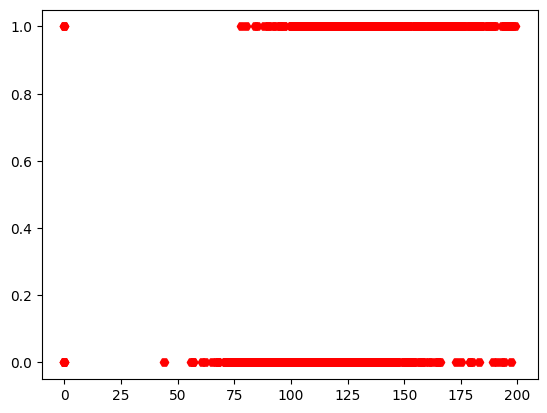

In [8]:
plt.scatter(x,y,color='r',marker='H')

In [9]:
def sigmoid(y):
    return (1/(1+np.exp(-y)))

In [10]:
def p(x,b0,b1):
    return (sigmoid(b0 + b1*x))

In [11]:
def cost(x,y,b0,b1):
    n = len(x)
    c = 0
    for i in range(n):
        c = c+y[i]*np.log(p(x[i],b0,b1) + 0.00001) + (1-y[i]) * np.log(1 - p(x[i],b0,b1)+0.0001)
    return -1*(c/n)

In [20]:
# Gradient Descent function
def gradientDescent(x, y, max_epochs=10, learning_rate=0.0001):
    b0 = 5
    b1 = 10
    n = len(x)

    for epoch in range(max_epochs):
        b0_cost = 0
        b1_cost = 0

        for i in range(n):
            b1_cost += (-y[i] + p(x[i], b0, b1)) * x[i]
            b0_cost += (-y[i] + p(x[i], b0, b1))

        b1 = b1 - learning_rate * (b1_cost / n)
        b0 = b0 - learning_rate * (b0_cost / n)

        c = cost(x, y, b0, b1)
        print(f"Epoch {epoch + 1}: Cost = {c}")

    return b0, b1

In [21]:
b0,b1 = gradientDescent(x,y)

Epoch 1: Cost = 5.9798507537059775
Epoch 2: Cost = 5.979850505964893
Epoch 3: Cost = 5.979850258223755
Epoch 4: Cost = 5.979850010482564
Epoch 5: Cost = 5.979849762741318
Epoch 6: Cost = 5.979849515000019
Epoch 7: Cost = 5.979849267258666
Epoch 8: Cost = 5.979849019517258
Epoch 9: Cost = 5.979848771775798
Epoch 10: Cost = 5.979848524034282


In [22]:
def yPredict(b0,b1,x):
    l = []
    for i in range(len(x)):
        if(p(x[i],b0,b1) >= 0.5):
            l.append(1)
        else:
            l.append(0)
    return(np.array(l))

In [16]:
y_predict = yPredict(b0,b1,x)